In [365]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import visualization
from astropy import units as u
from astropy.coordinates import SkyCoord
import os
import glob

import utils

In [388]:
def find_obj_in_sample(Obj_RA_Dec, Sample_RA_Dec, sep=0.0001*u.deg, nsteps=10):
    coord = Obj_RA_Dec
    for i in range(nsteps):
        match_ind = np.argwhere(Sample_RA_Dec.separation(coord) < sep)
        if len(match_ind) < 1:
            sep = sep * 1.1
        elif len(match_ind) > 1:
            sep = sep * 0.9
        elif len(match_ind) == 1:
            continue
    if len(match_ind) < 1:
        print('No Matches within %.2e degrees' % sep.value)
        return()
    elif len(match_ind) > 1:
        print('Multiple Matches within %.2e' % sep.value)
        return(match_ind)
    else:
        match_ind = match_ind[0,0]
        match_sep = Sample_RA_Dec[match_ind].separation(coord).deg
        return(match_ind, match_sep)

In [340]:
Phot_Dir = '/global/scratch/nathan_sandford/DEIMOS/Keck_Obs_2017/Photometry'
D_PayneDir = utils.D_PayneDir

temp = np.genfromtxt(Phot_Dir+'/GC_Photometry/pal14_dsim_input.dat', delimiter=" ",
                     dtype=str)

#Data Start
# data_start = 373  # M2
# data_start = 127  # M13
# data_start = 37  # M15
# data_start = 414  # M71
# data_start = 278  # M92
# data_start = 18  # NGC2419
# data_start = 32  # NGC7006
# data_start = 79  ## PAL14
data_start = 0

ID = temp[data_start:,0]
Mask_RA_Dec = SkyCoord([temp[i,1]+' '+temp[i,3] for i in range(len(temp))],unit=(u.hourangle, u.deg))[data_start:]
epoch = temp[data_start:,4].astype('float')
Mag = temp[data_start:,5].astype('float')
band = temp[data_start:,6]
weight = temp[data_start:,7].astype(int)

RA_min, RA_max = np.min(Mask_RA_Dec.ra.deg), np.max(Mask_RA_Dec.ra.deg)
Dec_min, Dec_max = np.min(Mask_RA_Dec.dec.deg), np.max(Mask_RA_Dec.dec.deg)

In [ ]:
D_PayneDir = utils.D_PayneDir
SpectraDir = D_PayneDir + 'spectra/M15/'
SpectraFile = 'm15_Horne.npz'
temp = np.load(SpectraDir + SpectraFile)
obj = temp['obj']
spec = temp['spec']
spectral_err = temp['spec_err']
dv = temp['dv']
Obs_RA_Dec = SkyCoord(temp['RA_Dec'])
temp.close()

In [467]:
temp = np.genfromtxt(D_PayneDir+'/Apogee_The_Payne.txt', dtype=str)
APOGEE_ID = temp[:,1]
APOGEE_RA_Dec = SkyCoord([temp[i,1]+' '+temp[i,2] for i in range(len(temp))],unit=u.deg)
Teff = temp[:,3]
Logg = temp[:,4]
MgH = temp[:,9]
FeH = temp[:,18]

In [443]:
matches = []
APOGEE_ind = []

for i in range(len(Obs_RA_Dec)):
    coord = Obs_RA_Dec[i]
    if obj[i][4] == 's':
        print('Skipping Serendip')
        print('')
        continue
    print('Object #%s' % obj[i][4:])
    print('RA: %f' % coord.ra.deg)
    print('Dec: %f' % coord.dec.deg)
    try:
        match_ind,match_sep = find_obj_in_sample(Obj_RA_Dec=coord, Sample_RA_Dec=APOGEE_RA_Dec)
        APOGEE_ind.append(match_ind)
        print(match_ind)
        print(match_sep)
        print('')
        matches.append(i)
    except ValueError:
        print('')

Object #0000006
RA: 322.357833
Dec: 12.254056
No Matches within 2.59e-04 degrees

Object #0000014
RA: 322.440000
Dec: 12.292389
No Matches within 2.59e-04 degrees

Object #0000019
RA: 322.473250
Dec: 12.310389
No Matches within 2.59e-04 degrees

Object #0000023
RA: 322.502125
Dec: 12.277389
No Matches within 2.59e-04 degrees

Object #0000029
RA: 322.539875
Dec: 12.332472
No Matches within 2.59e-04 degrees

Object #0000030
RA: 322.565792
Dec: 12.283278
No Matches within 2.59e-04 degrees

Object #0000031
RA: 322.580625
Dec: 12.287472
No Matches within 2.59e-04 degrees

Object #0000034
RA: 322.598833
Dec: 12.275611
No Matches within 2.59e-04 degrees

Object #0010337
RA: 322.494792
Dec: 12.291389
210253
3.892296969448763e-05

Skipping Serendip

Object #0010230
RA: 322.458042
Dec: 12.303444
No Matches within 2.59e-04 degrees

Object #0010510
RA: 322.563458
Dec: 12.329472
No Matches within 2.59e-04 degrees

Object #0010572
RA: 322.606625
Dec: 12.284750
No Matches within 2.59e-04 degrees

Obj

In [468]:
temp[APOGEE_ind,-1]

array(['good', 'vmac>20kms'], dtype='<U20')

In [466]:
for i in range(len(matches)):
    print('Index: %i' % matches[i])
    print('Object: #%s' % obj[matches[i]])
    print('DEIMOS Star Coordinate')
    print(Obs_RA_Dec[matches[i]])
    print('\nAPOGEE Star Coordinate')
    print(APOGEE_RA_Dec[APOGEE_ind[i]])
    print('\nTeff = %s K' % Teff[APOGEE_ind[i]])
    print('Logg = %s' % Logg[APOGEE_ind[i]])
    print('[Mg/H] = %s' % MgH[APOGEE_ind[i]])
    print('[Fe/H] = %s' % FeH[APOGEE_ind[i]])
    print('\n\n\n')


Index: 8
Object: #008.0010337
DEIMOS Star Coordinate
<SkyCoord (ICRS): (ra, dec) in deg
    (322.49479167, 12.29138889)>

APOGEE Star Coordinate
<SkyCoord (ICRS): (ra, dec) in deg
    (322.49479, 12.29135)>

Teff = 5663.6 K
Logg = 4.30
[Mg/H] = 0.23
[Fe/H] = 0.33




Index: 26
Object: #020.0010068
DEIMOS Star Coordinate
<SkyCoord (ICRS): (ra, dec) in deg
    (322.36570833, 12.25527778)>

APOGEE Star Coordinate
<SkyCoord (ICRS): (ra, dec) in deg
    (322.36563, 12.25525)>

Teff = 5650.5 K
Logg = 3.64
[Mg/H] = -0.36
[Fe/H] = -1.26






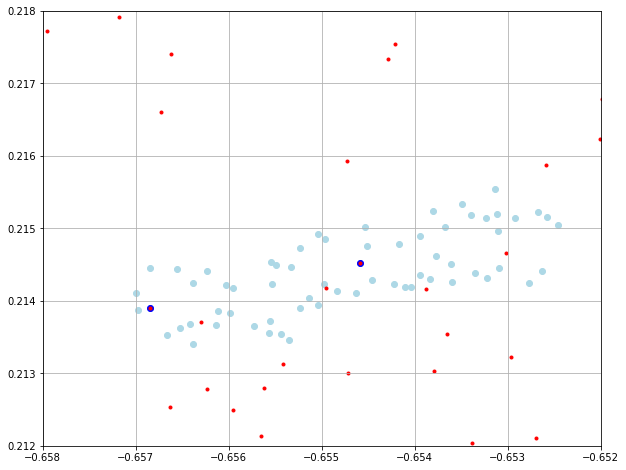

In [463]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)#, projection="aitoff")

apogee_ra = APOGEE_RA_Dec.ra.wrap_at(180 * u.deg).rad

obs_ra  = Obs_RA_Dec.ra.wrap_at(180 * u.deg).rad

ax.scatter(obs_ra, Obs_RA_Dec.dec.rad, marker='o',c='lightblue')
ax.scatter(obs_ra[matches], Obs_RA_Dec.dec.rad[matches], marker='o',c='blue')
ax.scatter(apogee_ra, APOGEE_RA_Dec.dec.rad, marker='.',c='r')

plt.grid(True)
plt.xlim(-0.658,-0.652)
plt.ylim(0.212,0.218)
plt.show()
